In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('WineDataset.csv')


,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3


In [ ]:

print("Пропущенные значения:\n", df.isnull().sum())

Пропущенные значения:
 Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64


In [ ]:

scaler = StandardScaler()
X = df.drop("Wine", axis=1)
y = df["Wine"]
X_scaled = scaler.fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Описательная статистика:
           Alcohol  Malic Acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         

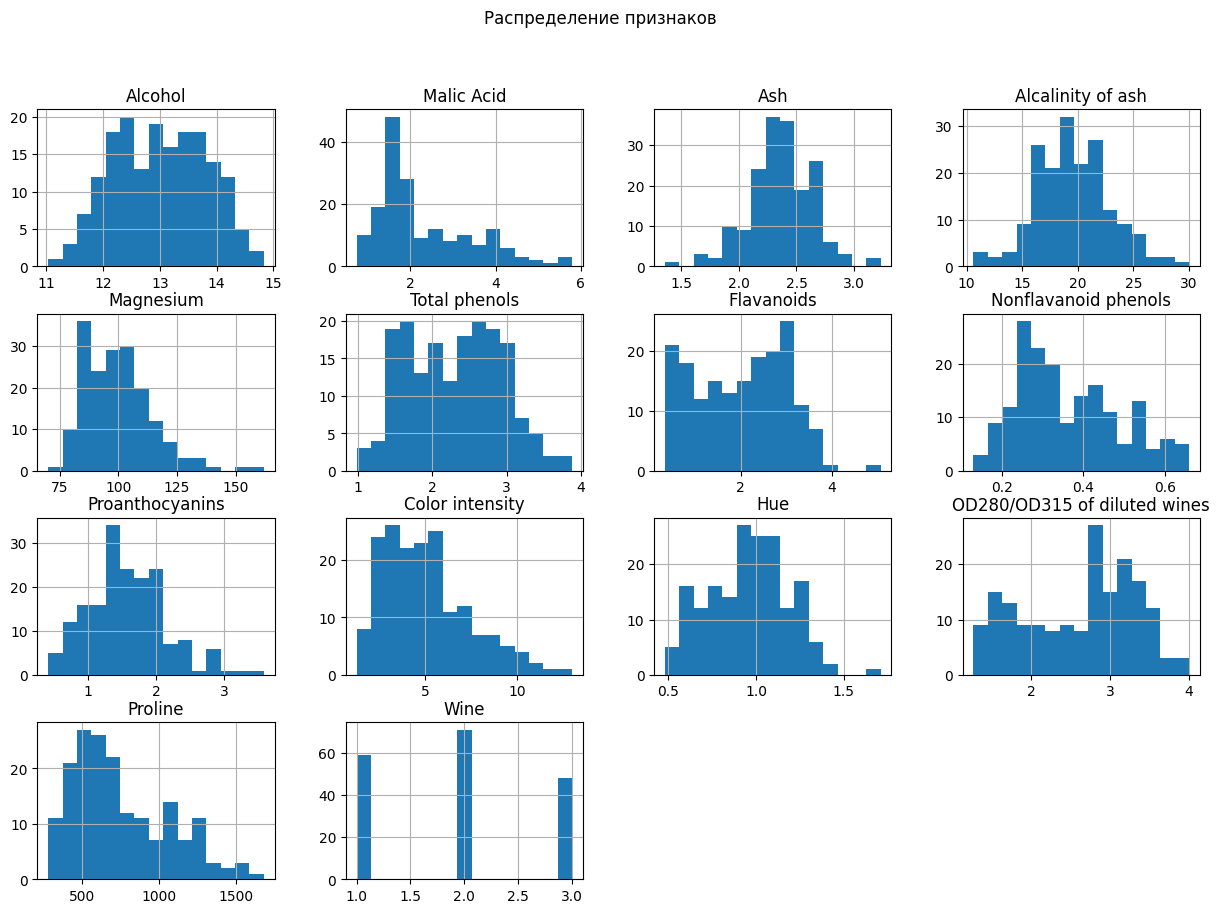

In [ ]:

print("\nОписательная статистика:\n", df.describe())


df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Распределение признаков")
plt.show()

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train.iloc[k_indices]
            pred = np.bincount(k_nearest_labels).argmax()
            predictions.append(pred)
        return np.array(predictions)

In [ ]:

np.random.seed(42)
random_features = np.random.choice(X.shape[1], size=3, replace=False)
X_train_random = X_train[:, random_features]
X_test_random = X_test[:, random_features]

In [ ]:

fixed_features = [0, 1, 2]  
X_train_fixed = X_train[:, fixed_features]
X_test_fixed = X_test[:, fixed_features]

In [ ]:

k_values = [3, 5, 10]
for k in k_values:
    print(f"\nОценка для k = {k}")

    
    knn_random = KNN(k=k)
    knn_random.fit(X_train_random, y_train)
    y_pred_random = knn_random.predict(X_test_random)
    print(f"Точность модели 1 (случайные признаки): {accuracy_score(y_test, y_pred_random):.2f}")
    print("Матрица ошибок модели 1:\n", confusion_matrix(y_test, y_pred_random))

   
    knn_fixed = KNN(k=k)
    knn_fixed.fit(X_train_fixed, y_train)
    y_pred_fixed = knn_fixed.predict(X_test_fixed)
    print(f"Точность модели 2 (фиксированные признаки): {accuracy_score(y_test, y_pred_fixed):.2f}")
    print("Матрица ошибок модели 2:\n", confusion_matrix(y_test, y_pred_fixed))


Оценка для k = 3
Точность модели 1 (случайные признаки): 0.86
Матрица ошибок модели 1:
 [[14  0  0]
 [ 2 12  0]
 [ 2  1  5]]
Точность модели 2 (фиксированные признаки): 0.92
Матрица ошибок модели 2:
 [[12  0  2]
 [ 0 13  1]
 [ 0  0  8]]

Оценка для k = 5
Точность модели 1 (случайные признаки): 0.92
Матрица ошибок модели 1:
 [[14  0  0]
 [ 1 13  0]
 [ 1  1  6]]
Точность модели 2 (фиксированные признаки): 0.86
Матрица ошибок модели 2:
 [[11  0  3]
 [ 0 13  1]
 [ 0  1  7]]

Оценка для k = 10
Точность модели 1 (случайные признаки): 0.92
Матрица ошибок модели 1:
 [[14  0  0]
 [ 1 13  0]
 [ 1  1  6]]
Точность модели 2 (фиксированные признаки): 0.83
Матрица ошибок модели 2:
 [[11  0  3]
 [ 0 13  1]
 [ 1  1  6]]
